# Wine Analysis and Classification Mini Project. (LP2)
## Dr. D. Y. Patil Institute of Technology.
### Department of Computer Engineering.
### Student Name:  <h4>Vishal N. Shinde (B150244393)</h4>.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px

## Import the dataset:

In [3]:
dataset = pd.read_csv("winequalityred.csv")
dataset.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

<h1>Dimensions:</h1>

In [4]:
print(f"Rows:{dataset.shape[0]}, columns:{dataset.shape[1]}")

Rows:1599, columns:12


## Checking for null values:

In [5]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Checking quality and bottle counts:

In [7]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<h2>Plotting histogram:</h2>
How many bottles of Which quality:

In [8]:
fig = px.histogram(dataset, x = 'quality')
fig.show()

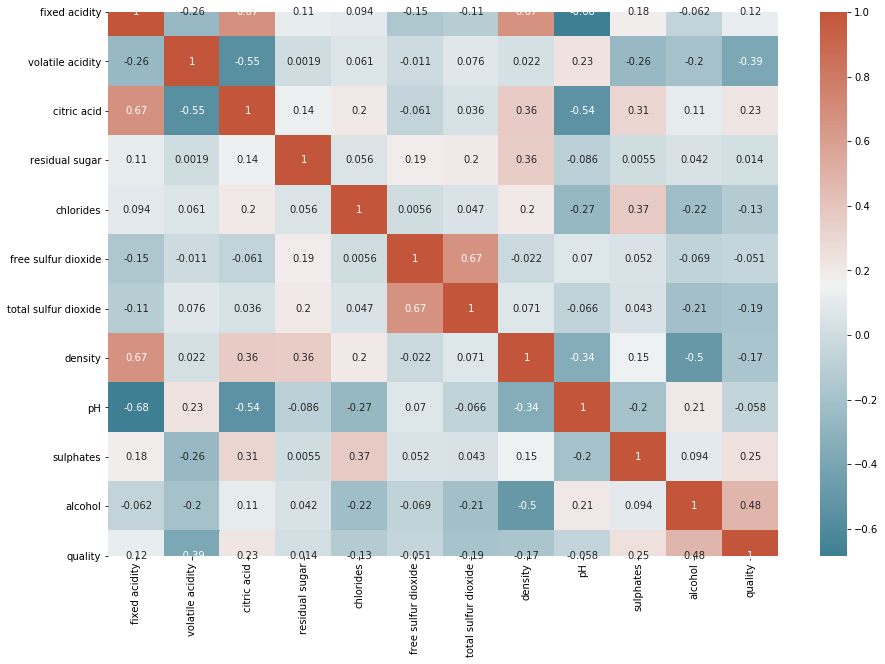

In [9]:
corr = dataset.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, \
           annot = True, cmap = sns.diverging_palette(220, 20,as_cmap=100))

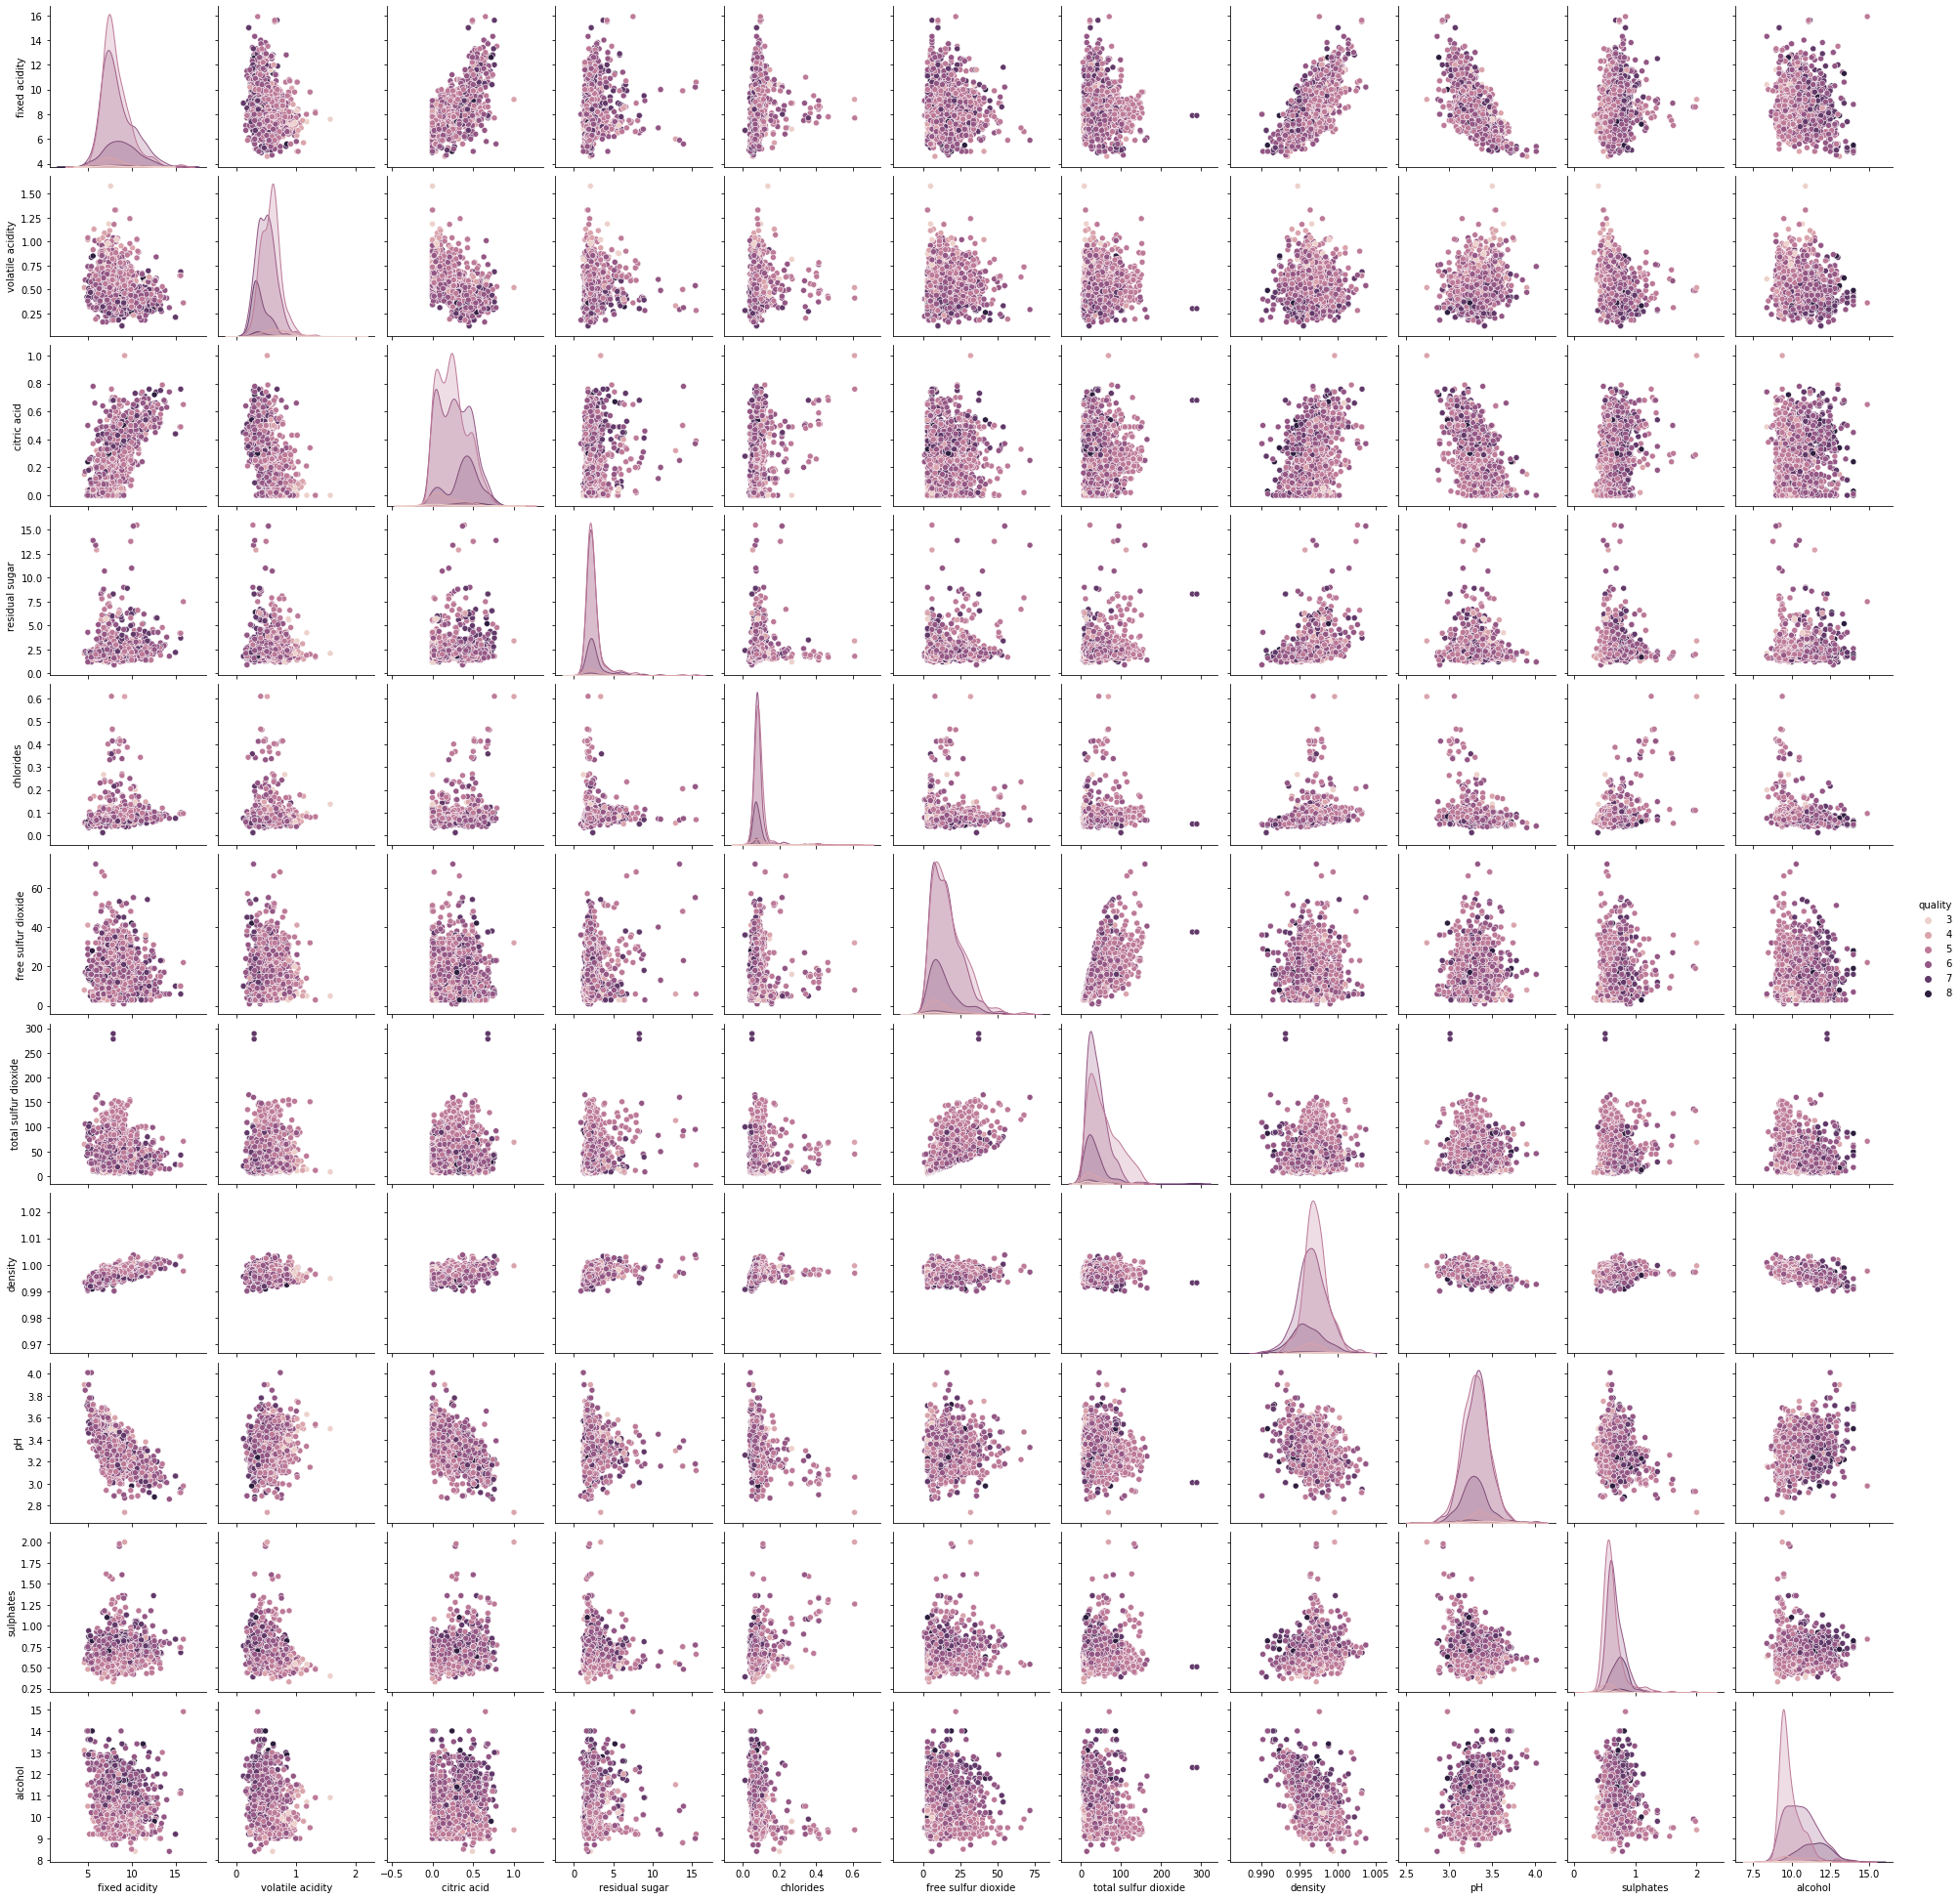

In [10]:
columns_to_plot = list(dataset.columns)
columns_to_plot.remove('quality')
sns.pairplot(dataset, hue = 'quality', vars=columns_to_plot)

In [11]:
dataset['goodquality'] = [1 if i >= 7 else 0 for i in dataset['quality']]

In [12]:
dataset['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [13]:
X = dataset.drop(['quality', 'goodquality'], axis = 1)
y = dataset['goodquality']

In [14]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.20, random_state = 0)

# Trees and Forests:
## 1. Decision Tree:

In [16]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [17]:
TreeModel = DecisionTreeClassifier(random_state=1)
TreeModel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [18]:
TreePred1 = TreeModel.predict(X_test)

In [19]:
print(classification_report(y_test, TreePred1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       290
           1       0.48      0.77      0.59        30

    accuracy                           0.90       320
   macro avg       0.73      0.84      0.77       320
weighted avg       0.93      0.90      0.91       320



## 2. Random Forest:

In [20]:
from sklearn.ensemble import RandomForestClassifier
ForestModel = RandomForestClassifier(random_state=1)
ForestModel.fit(X_train, y_train)
ForestPred1 = ForestModel.predict(X_test)

In [21]:
print(classification_report(y_test, ForestPred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.67      0.60      0.63        30

    accuracy                           0.93       320
   macro avg       0.81      0.78      0.80       320
weighted avg       0.93      0.93      0.93       320



## Inferring affecting factors using feature importances:

In [22]:
feat_importances = pd.Series(ForestModel.feature_importances_,\
                             index=X_features.columns)

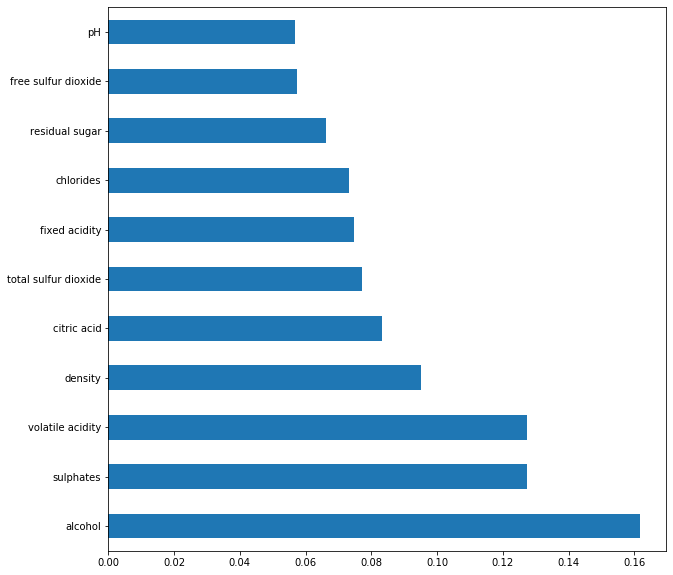

In [23]:
feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10,10))

In [24]:
dataset_temp = dataset[dataset['goodquality'] == 1]
dataset_temp.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     217.000000        217.000000   217.000000      217.000000   
mean        8.847005          0.405530     0.376498        2.708756   
std         1.999977          0.144963     0.194438        1.363026   
min         4.900000          0.120000     0.000000        1.200000   
25%         7.400000          0.300000     0.300000        2.000000   
50%         8.700000          0.370000     0.400000        2.300000   
75%        10.100000          0.490000     0.490000        2.700000   
max        15.600000          0.915000     0.760000        8.900000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  217.000000           217.000000            217.000000  217.000000   
mean     0.075912            13.981567             34.889401    0.996030   
std      0.028480            10.234615             32.572238    0.002201   
min      0.012000             3.000000              7.000000    0.990640   
25%      0.062000             6.000000             17.000000    0.994700   
50%      0.073000            11.000000             27.000000    0.995720   
75%      0.085000            18.000000             43.000000    0.997350   
max      0.358000            54.000000            289.000000    1.003200   

               pH   sulphates     alcohol     quality  goodquality  
count  217.000000  217.000000  217.000000  217.000000        217.0  
mean     3.288802    0.743456   11.518049    7.082949          1.0  
std      0.154478    0.134038    0.998153    0.276443          0.0  
min      2.880000    0.390000    9.200000    7.000000          1.0  
25%      3.200000    0.650000   10.800000    7.000000          1.0  
50%      3.270000    0.740000   11.600000    7.000000          1.0  
75%      3.380000    0.820000   12.200000    7.000000          1.0  
max      3.780000    1.360000   14.000000    8.000000          1.0

In [25]:
dataset_temp = dataset[dataset['goodquality'] == 0]
dataset_temp.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1382.000000       1382.000000  1382.000000     1382.000000   
mean        8.236831          0.547022     0.254407        2.512120   
std         1.682726          0.176337     0.189665        1.415778   
min         4.600000          0.160000     0.000000        0.900000   
25%         7.100000          0.420000     0.082500        1.900000   
50%         7.800000          0.540000     0.240000        2.200000   
75%         9.100000          0.650000     0.400000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1382.000000          1382.000000           1382.000000  1382.000000   
mean      0.089281            16.172214             48.285818     0.996859   
std       0.049113            10.467685             32.585604     0.001808   
min       0.034000             1.000000              6.000000     0.990070   
25%       0.071000             8.000000             23.000000     0.995785   
50%       0.080000            14.000000             39.500000     0.996800   
75%       0.091000            22.000000             65.000000     0.997900   
max       0.611000            72.000000            165.000000     1.003690   

                pH    sulphates      alcohol      quality  goodquality  
count  1382.000000  1382.000000  1382.000000  1382.000000       1382.0  
mean      3.314616     0.644754    10.251037     5.408828          0.0  
std       0.154135     0.170629     0.969664     0.601719          0.0  
min       2.740000     0.330000     8.400000     3.000000          0.0  
25%       3.210000     0.540000     9.500000     5.000000          0.0  
50%       3.310000     0.600000    10.000000     5.000000          0.0  
75%       3.410000     0.700000    10.900000     6.000000          0.0  
max       4.010000     2.000000    14.900000     6.000000          0.0

###### From the above data, it is clear that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on avg, higher levels of sulphates on avg, and higher levels of residual sugars on avg.

Confusion matrix for tree:
 [[265  25]
 [  7  23]]
Accuracy of tree: 0.9


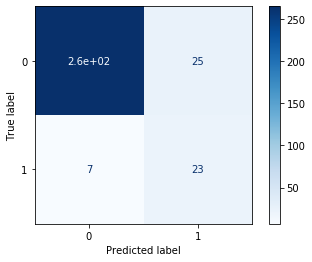

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
                            plot_confusion_matrix
Tmatrix = confusion_matrix(y_test, TreePred1)
Tacc = accuracy_score(y_test, TreePred1)
print(f"Confusion matrix for tree:\n {Tmatrix}")
print(f"Accuracy of tree: {Tacc}")
plot_confusion_matrix(TreeModel, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

Confusion matrix for Forest:
 [[281   9]
 [ 12  18]]
Accuracy of Forest: 0.934375


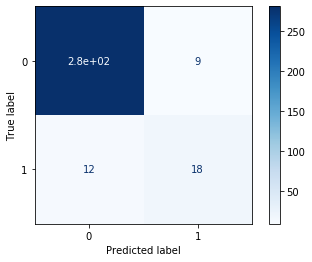

In [27]:
Fmatrix = confusion_matrix(y_test, ForestPred1)
Facc = accuracy_score(y_test, ForestPred1)
print(f"Confusion matrix for Forest:\n {Fmatrix}")
print(f"Accuracy of Forest: {Facc}")
plot_confusion_matrix(ForestModel, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

In [28]:
dataset = pd.read_csv('winequalityred.csv')
X = dataset.iloc[:, :11].values
y = dataset.iloc[:, 11].values

#Train and test split
X_train,X_test,y_train,y_test = tts(X, y, test_size = 0.2, random_state = 0)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)


# Regressors for classification:
## 1. Logistic Regressor:

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

Logisticpred = classifier1.predict(X_test)

Confusion matrix for Logistic Regressor:
 [[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 104  30   1   0]
 [  0   0  37  90  15   0]
 [  0   0   2  16   9   0]
 [  0   0   0   1   2   0]]
Accuracy of Logistic Regressor: 0.634375


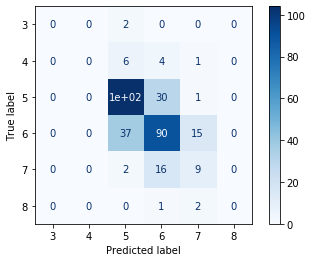

In [30]:
LogisticMatrix = confusion_matrix(y_test, Logisticpred)
Logisticacc = accuracy_score(y_test, Logisticpred)
print(f"Confusion matrix for Logistic Regressor:\n {LogisticMatrix}")
print(f"Accuracy of Logistic Regressor: {Logisticacc}")
plot_confusion_matrix(classifier1, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

## 2. KNN classifier:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5,\
                                   metric = 'minkowski',\
                                   p = 2)
classifier2.fit(X_train, y_train)
KNNpred = classifier2.predict(X_test)

Confusion matrix for KNN:
 [[ 0  0  0  2  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0 96 37  1  1]
 [ 0  0 48 85  9  0]
 [ 0  0  6  6 13  2]
 [ 0  0  0  1  2  0]]
Accuracy of KNN: 0.60625


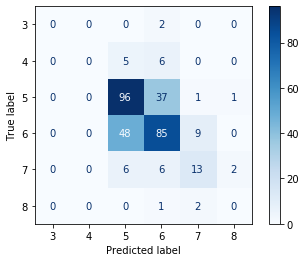

In [32]:
KNNMatrix = confusion_matrix(y_test, KNNpred)
KNNacc = accuracy_score(y_test, KNNpred)
print(f"Confusion matrix for KNN:\n {KNNMatrix}")
print(f"Accuracy of KNN: {KNNacc}")
plot_confusion_matrix(classifier2, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

### Arbitrary Work:

In [33]:
y = np.bincount(y_train.ravel())
ii = np.nonzero(y)[0]
zip1 = zip(ii, y[ii])
print(f"Quality  Count")
for i in zip1:
    print(f"   {i[0]}       {i[1]}")

Quality  Count
   3       8
   4       42
   5       546
   6       496
   7       172
   8       15
